In [295]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import config
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [297]:
url="https://www.billboard.com/charts/hot-100/"

In [298]:
response=requests.get(url)

In [299]:
soup=BeautifulSoup(response.content)

In [300]:
soup

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]--><!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]--><!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboa

In [301]:
title = soup.select('h3.c-title.a-font-basic')

In [302]:
title

[<h3 class="c-title a-font-basic u-font-size-9 u-letter-spacing-0006 u-line-height-normal u-font-weight-700 lrv-u-color-black" id="title-of-a-story">
 
 	
 	
 		
 					Gains in Weekly Performance		
 	
 </h3>,
 <h3 class="c-title a-font-basic u-font-size-9 u-letter-spacing-0006 u-line-height-normal u-font-weight-700 lrv-u-color-black" id="title-of-a-story">
 
 	
 	
 		
 					Additional Awards		
 	
 </h3>,
 <h3 class="c-title a-font-basic u-letter-spacing-0010 u-max-width-397 lrv-u-font-size-16 lrv-u-font-size-14@mobile-max u-line-height-22px u-word-spacing-0063 u-line-height-normal@mobile-max a-truncate-ellipsis-2line lrv-u-margin-b-025 lrv-u-margin-b-00@mobile-max" id="title-of-a-story">
 
 	
 	
 		
 					Golden		
 	
 </h3>,
 <h3 class="c-title a-font-basic u-letter-spacing-0010 u-max-width-397 lrv-u-font-size-16 lrv-u-font-size-14@mobile-max u-line-height-22px u-word-spacing-0063 u-line-height-normal@mobile-max a-truncate-ellipsis-2line lrv-u-margin-b-025 lrv-u-margin-b-00@mobile-max"

In [303]:
song_name = []
for song in soup.select("h3.c-title.a-font-basic")[2::]:
    song_name.append(song.get_text().strip())    

In [304]:
len(song_name)

100

In [305]:
song_name

['Golden',
 'Ordinary',
 'Soda Pop',
 'What I Want',
 'Your Idol',
 'Manchild',
 'Lose Control',
 'Daisies',
 'Love Me Not',
 'Die With A Smile',
 'I Got Better',
 'Mutt',
 "How It's Done",
 'Beautiful Things',
 'A Bar Song (Tipsy)',
 'Undressed',
 'Tears',
 'Just In Case',
 'Pink Pony Club',
 'Good News',
 'What It Sounds Like',
 'Folded',
 'Back To Friends',
 "I'm The Problem",
 'Man I Need',
 'Safe',
 'Mystical Magical',
 'Luther',
 'Takedown',
 'Free',
 'It Depends',
 'When Did You Get Hot?',
 'Bottle Rockets',
 'Burning Blue',
 'Yukon',
 'All The Way',
 'Magnet',
 'Romantic Homicide',
 "Sorry I'm Here For Someone Else",
 'Happen To Me',
 'No Broke Boys',
 'Outside',
 'Pretty & Petty',
 'Bar None',
 'Pick It Up',
 'Hello',
 'Dead',
 '12 To 12',
 'Hell At Night',
 'Worst Way',
 "Nobody's Son",
 'Revolving Door',
 'Bodega Baddie',
 'Back In The Saddle',
 'Sugar On My Tongue',
 'Gabriela',
 'Jealous Type',
 'House Again',
 'Somewhere Over Laredo',
 'The Dead Dance',
 'Wildflower',
 '6

In [306]:
artists_names = []
artists_all = soup.find_all('span', class_ = "a-children-link-color-black")
for i in artists_all:
    artists_names.append(i.get_text().strip())
artists_names

['HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Alex Warren',
 'Saja Boys: Andrew Choi, Neckwav, Danny Chung, Kevin Woo & samUIL Lee',
 'Morgan Wallen Featuring Tate McRae',
 'Saja Boys: Andrew Choi, Neckwav, Danny Chung, Kevin Woo & samUIL Lee',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Justin Bieber',
 'Ravyn Lenae',
 'Lady Gaga & Bruno Mars',
 'Morgan Wallen',
 'Leon Thomas',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Benson Boone',
 'Shaboozey',
 'sombr',
 'Sabrina Carpenter',
 'Morgan Wallen',
 'Chappell Roan',
 'Shaboozey',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Kehlani',
 'sombr',
 'Morgan Wallen',
 'Olivia Dean',
 'Cardi B Featuring Kehlani',
 'Benson Boone',
 'Kendrick Lamar & SZA',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Rumi, JINU, EJAE & Andrew Choi',
 'Chris Brown Featuring Bryson Tiller',
 'Sabrina Carpenter',
 'Scotty McCreery & Hootie & The Blowfish',
 'Mariah the Scientist',
 'Justin Bieber',
 'BigXthaPlug Featuring Bailey Zimmerman',
 'Cardi B',
 'd4vd',
 'Benson Boon

In [307]:
len(artists_names)

100

In [308]:
billboard100_df=pd.DataFrame({"Song":song_name,"Artist":artists_names})

In [309]:
billboard100_df

,Song,Artist
0,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI"
1,Ordinary,Alex Warren
2,Soda Pop,"Saja Boys: Andrew Choi, Neckwav, Danny Chung, ..."
3,What I Want,Morgan Wallen Featuring Tate McRae
4,Your Idol,"Saja Boys: Andrew Choi, Neckwav, Danny Chung, ..."
...,...,...
95,Which One,Drake & Central Cee
96,Goodbye,Sabrina Carpenter
97,Darlin',Chase Matthew
98,Went Legit,G Herbo


In [554]:
billboard100_df.to_csv("billboard100.csv")

In [310]:
#program for choosing between trending now and others, if trending now, you display a random song 

In [312]:
import random
# Ask the user
song_choice = input("Do you want a trending song? (yes/no): ")
if song_choice.lower() == "yes":
    songs_list = billboard100_df['Song']
    recommendation=random.choice(songs_list)
else: 
    print("Sorry, still processing your request")

Do you want a trending song? (yes/no):  yes


In [16]:
recommendation

'Somebody Loves Me'

In [313]:
from IPython.display import IFrame


In [314]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [365]:
def recommend_trending_song ():
    song_choice = input("Do you want a trending song? (yes/no): ")
    if song_choice.lower() == "yes":
        random_index = random.choice(billboard100_df.index)
        song = billboard100_df.loc[random_index, "Song"]
        artist = billboard100_df.loc[random_index, "Artist"]
        results = sp.search(q=f"{song} {artist}")
        track_id=results["tracks"]["items"][0]["id"]

        
        play_song(track_id)
        print(song,artist)
        return play_song(track_id)
        
    else:
        print("Sorry, still processing your request")
        return None

In [366]:
recommend_trending_song ()

Do you want a trending song? (yes/no):  yes


Better Me For You (Brown Eyes) Max McNown


In [557]:
song_list=pd.read_csv("audio_features_dataset_curated.csv")

In [558]:
song_list

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [559]:
song_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

In [560]:
song_list.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [561]:
df_song_list=pd.DataFrame(song_list, columns=song_list.columns)

In [562]:
df_song_list=df_song_list.dropna(subset=['artists','album_name','track_name'])

In [563]:
df_song_list.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [564]:
df_song_list

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [565]:
duplicates=df_song_list.duplicated()
print(duplicates.sum())

8277


In [602]:
for col in df_song_list.columns:
    duplicates = df_song_list[col].duplicated().sum()
    print(f"{col}: {duplicates} duplicates")

track_id: 0 duplicates
artists: 17667 duplicates
album_name: 12618 duplicates
track_name: 2863 duplicates
popularity: 30114 duplicates
duration_ms: 7887 duplicates
explicit: 30213 duplicates
danceability: 29283 duplicates
energy: 28643 duplicates
key: 30203 duplicates
loudness: 17633 duplicates
mode: 30213 duplicates
speechiness: 28986 duplicates
acousticness: 26259 duplicates
instrumentalness: 25444 duplicates
liveness: 28592 duplicates
valence: 28657 duplicates
tempo: 8978 duplicates
time_signature: 30210 duplicates
cluster: 30207 duplicates
cluster_label: 30207 duplicates


In [566]:
df_song_list.drop_duplicates(subset=["track_name","danceability", "energy","loudness","speechiness", "liveness"], keep="first", inplace=True, ignore_index=True)

In [567]:
df_song_list

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30210,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
30211,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
30212,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
30213,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [568]:
df_song_list['explicit'] = df_song_list['explicit'].astype(int) 

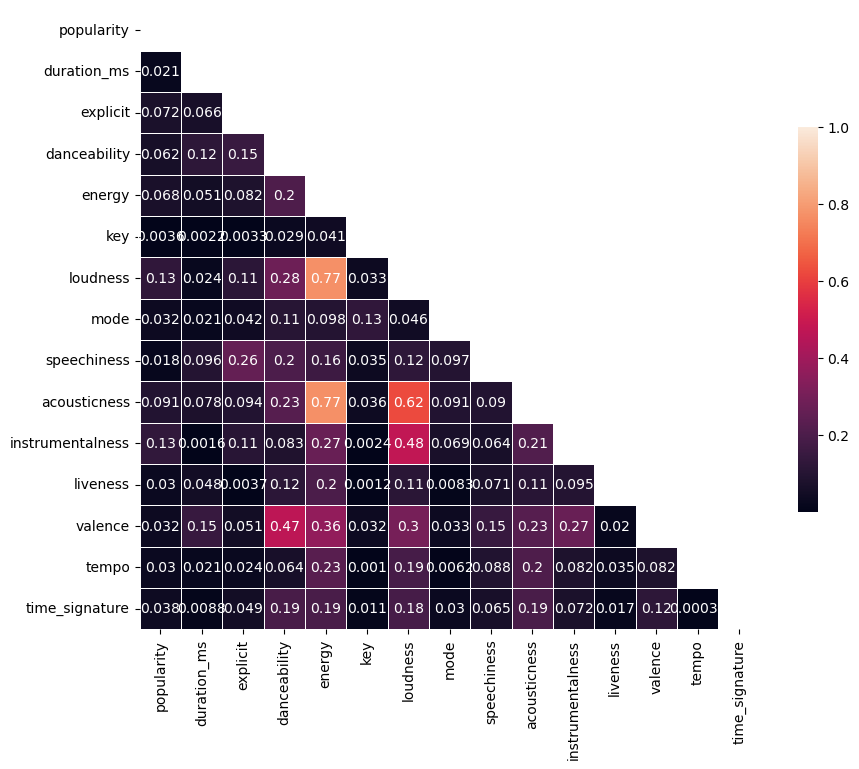

In [569]:
df_song_list_numeric=df_song_list.select_dtypes(include=["number"])
corr=np.abs(df_song_list_numeric.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [570]:
#Scaling to ensure that the features contribute equally to the clustering decision.(Some features have much larger values than others)

In [571]:
selected_features = ['danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'speechiness', 'liveness', 'tempo']

In [572]:
df_song_list_numeric_filtered=df_song_list[selected_features]

In [573]:
from sklearn.preprocessing import StandardScaler

In [574]:
scaler = StandardScaler()

In [575]:
scaler.fit(df_song_list_numeric_filtered)

StandardScaler()

In [576]:
df_song_list_numeric_filtered_scaled=scaler.transform(df_song_list_numeric_filtered)

In [577]:
from sklearn.cluster import KMeans

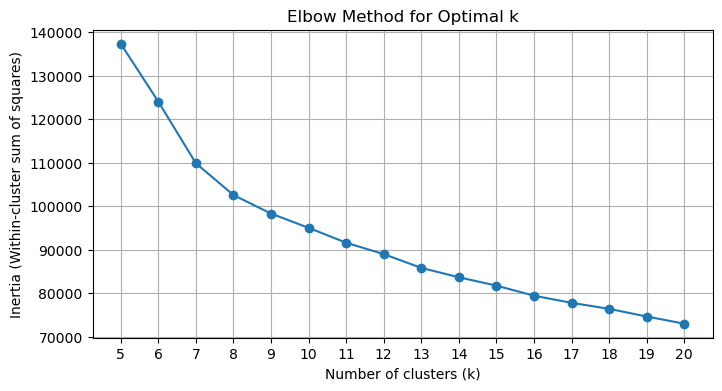

In [578]:
inertias = []
k_range = range(5, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_song_list_numeric_filtered_scaled)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [579]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import os

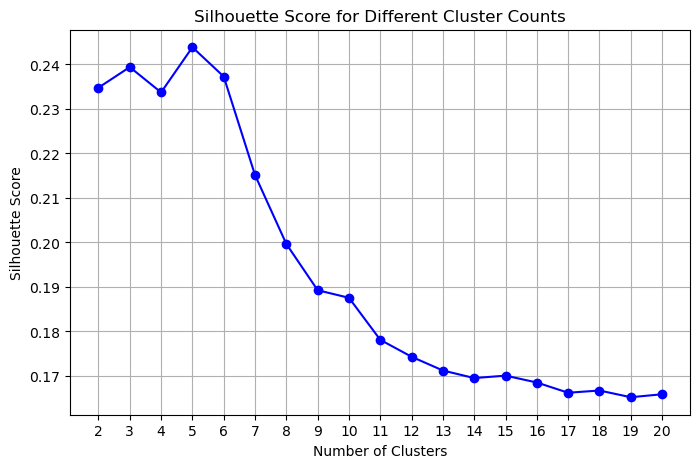

In [580]:
cluster_range = range(2, 21)
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_song_list_numeric_filtered_scaled)  
    score = silhouette_score(df_song_list_numeric_filtered_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [581]:
silhouette_scores

[np.float64(0.23477956640016898),
 np.float64(0.23940770512103984),
 np.float64(0.23372161481314263),
 np.float64(0.24387166534313875),
 np.float64(0.23728696130553797),
 np.float64(0.21515427620630384),
 np.float64(0.19966279565765999),
 np.float64(0.18927248376231526),
 np.float64(0.18756558730432502),
 np.float64(0.17812310163075615),
 np.float64(0.17432088678924884),
 np.float64(0.1712290243512434),
 np.float64(0.16952959082967864),
 np.float64(0.1700769419684354),
 np.float64(0.16853403110587103),
 np.float64(0.16623385015453856),
 np.float64(0.1667333067067461),
 np.float64(0.16522713234239625),
 np.float64(0.165891618066967)]

In [582]:
from sklearn.preprocessing import MinMaxScaler

In [583]:
minmax = MinMaxScaler()

In [584]:
minmax.fit(df_song_list_numeric_filtered)
df_song_list_numeric_filtered_scaled_minmax = minmax.transform(df_song_list_numeric_filtered)

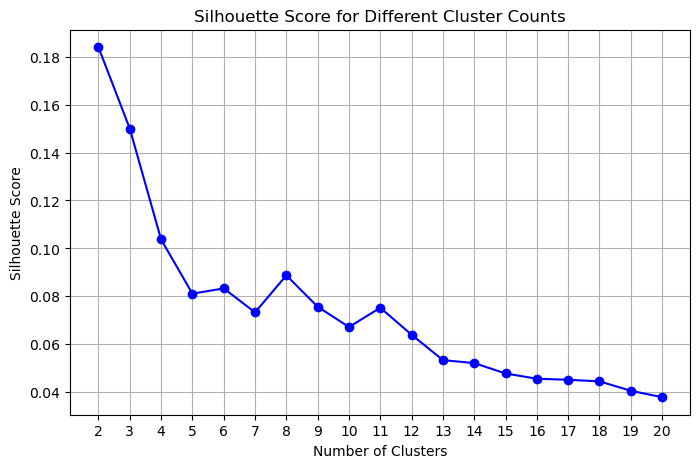

In [585]:
cluster_range = range(2, 21)
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_song_list_numeric_filtered_scaled_minmax)  
    score = silhouette_score(df_song_list_numeric_scaled_minmax, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

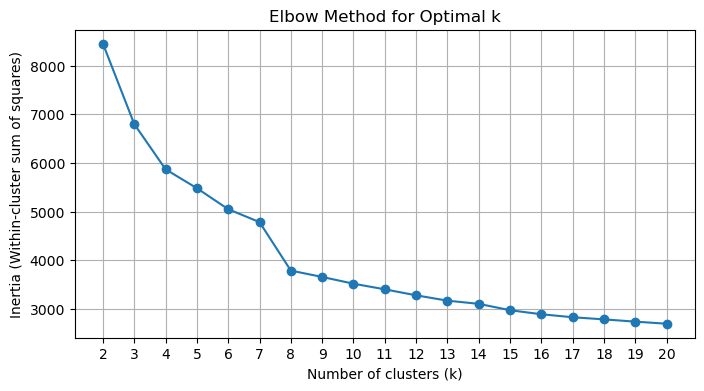

In [586]:
inertias = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_song_list_numeric_filtered_scaled_minmax)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [587]:
kmeans = KMeans(n_clusters=8, random_state=42)
df_song_list["cluster"] = kmeans.fit_predict(df_song_list_numeric_filtered_scaled)

In [588]:
df_song_list

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,6
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30210,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,2
30211,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,2
30212,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,1
30213,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,6


In [589]:
import pickle

# Save the trained KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Also save the scaler if you used one
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [611]:
def recommend_trending_song():
    song_choice = input("Do you want a trending song? (yes/no): ")
    
    if song_choice.lower() == "yes":
        random_index = random.choice(billboard100_df.index)
        song = billboard100_df.loc[random_index, "Song"]
        artist = billboard100_df.loc[random_index, "Artist"]
        results = sp.search(q=f"{song} {artist}")
        track_id = results["tracks"]["items"][0]["id"]
        
        play_song(track_id)
        print(song, artist)
        return play_song(track_id)
        
    else:
        print("Showing 3 sample songs from each cluster:\n")
        
        # Get all cluster IDs
        all_clusters = sorted(df_song_list["cluster"].unique())
        
        for cluster_id in all_clusters:
            print(f"\n=== Cluster {cluster_id} ===")
            
            # Pick 3 random songs from this cluster
            cluster_songs = df_song_list[df_song_list["cluster"] == cluster_id]
            samples = cluster_songs.sample(3)
            
            # Loop through each sampled song
            for i in range(len(samples)):
                song = samples.iloc[i]["track_name"]
                artist = samples.iloc[i]["artists"]
                print(f"{i+1}. {song} by {artist}")
                
                # Spotify search + embedded player
                results = sp.search(q=f"{song} {artist}")
                if results["tracks"]["items"]:
                    track_id = results["tracks"]["items"][0]["id"]
                    display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}", 
                                   width="300", height="80"))
        
        return "Finished displaying all cluster samples"

In [612]:
recommend_trending_song ()


Do you want a trending song? (yes/no):  no


Showing 3 sample songs from each cluster:


=== Cluster 0 ===
1. What's The Difference by Dr. Dre;Eminem;Xzibit


2. What a Karavaad by Anirudh Ravichander;Dhanush


3. Malvadão by Xamã;Damassaclan;Neo Beats



=== Cluster 1 ===
1. The Open Road by Hollow Coves


2. Benaqaab by Anurag Vashisht;Unluv


3. Meet Me in the Shade by Chris Cresswell



=== Cluster 2 ===
1. String Quartet in D Major, Op. 64 No. 5, Hob. III:63 "The Lark": IV. Finale. Vivace by Joseph Haydn;Arioso Quartett Wien


2. Messy Morning by Laika Room


3. 2 Arabesques, L. 66: I. Andantino con moto by Claude Debussy;Michel Béroff



=== Cluster 3 ===
1. To My Knees (Live) by Hillsong Young & Free


2. Camila, Camila by Biquini Cavadão


3. Jack El Destripador vs. Hercules by Adlomusic



=== Cluster 4 ===
1. Don't Worry by All Ok


2. Little Saint Nick by The Beach Boys


3. Marco's Hall by Panteon Rococo



=== Cluster 5 ===
1. Purple Amethyst by Sarah, the Illstrumentalist


2. Wahran - DJ Yo! Amapiano Mix by RANDALL;Dj Yo!


3. Song for Rollins by Buena Onda Reggae Club



=== Cluster 6 ===
1. Echoes by Armin van Buuren;Florentin;Jordan Grace


2. Que sea acabe el mundo por favor by Alex Anwandter


3. Seharusnya by Last Child



=== Cluster 7 ===
1. Aku Rindu by Koil


2. A Flor - Ao Vivo by Los Hermanos


3. I Want To Come Home For Christmas by Marvin Gaye


'Finished displaying all cluster samples'

In [592]:
cluster_characteristics = df_song_list.groupby('cluster')[selected_features].mean()

print(cluster_characteristics)

         danceability    energy   valence  acousticness  instrumentalness  \
cluster                                                                     
0            0.697758  0.676499  0.582019      0.282634          0.046080   
1            0.494352  0.343631  0.315729      0.736302          0.019474   
2            0.401206  0.183939  0.234066      0.886454          0.853065   
3            0.498184  0.744077  0.442533      0.223502          0.069602   
4            0.706705  0.730384  0.752267      0.200457          0.021153   
5            0.641561  0.687761  0.347016      0.144444          0.793083   
6            0.555653  0.717321  0.346597      0.109250          0.021196   
7            0.452565  0.776513  0.459039      0.111141          0.022611   

         speechiness  liveness       tempo  
cluster                                     
0           0.317712  0.194426  125.574101  
1           0.040571  0.148199  114.151592  
2           0.049557  0.136657  103.865122  
3   

In [593]:
cluster_sizes = df_song_list['cluster'].value_counts()
print(cluster_sizes)

cluster
4    6911
6    5517
1    5303
7    4322
5    2595
2    2052
3    1851
0    1664
Name: count, dtype: int64


In [594]:
#labeling the clusters

In [595]:
cluster_labels={0:"Trap, Hip-Hop",
        1:"Soft Beats, Romantic",
        2:"Classical,Dreamy",
        3:"Lively sounds",
        4:"High Rhythm, Danceable Songs",
        5:"Deep pulsating beats",
        6:"Loud, expressive songs",
        7:"Miscellaneous"
}

In [596]:
df_song_list["cluster_label"]=df_song_list["cluster"].map(cluster_labels)

In [597]:
df_song_list

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,cluster_label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,4,"High Rhythm, Danceable Songs"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1,"Soft Beats, Romantic"
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,6,"Loud, expressive songs"
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,1,"Soft Beats, Romantic"
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1,"Soft Beats, Romantic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30210,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,2,"Classical,Dreamy"
30211,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,2,"Classical,Dreamy"
30212,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,1,"Soft Beats, Romantic"
30213,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,6,"Loud, expressive songs"


In [598]:
df_song_list.to_csv("df_song_list.csv")

In [615]:
def recommend_trending_song():
    song_choice = input("Do you want a trending song? (yes/no): ")
    
    if song_choice.lower() == "yes":
        random_index = random.choice(billboard100_df.index) # picks one index(row) at random from a list of row indices of the dataframe
        song = billboard100_df.loc[random_index, "Song"] #fetching the song title and artist name from that random row
        artist = billboard100_df.loc[random_index, "Artist"]
        results = sp.search(q=f"{song} {artist}") #Spotify API search function using song and artist names (results contains search results in JSON format)
        track_id = results["tracks"]["items"][0]["id"] #from a list of track matches from Spotify, pick the first match and extract its Spotify id.
        
        play_song(track_id) #Calls the function to play the Spotify track with the given track_id
        print(song, artist)
        return play_song(track_id)
        
    else:
        available_labels = df_song_list["cluster_label"].unique()
        print(available_labels)
        # Ask the user to pick a cluster label
        choice = input("\nEnter the name of the cluster you want to explore: ")
        if choice not in available_labels:
            print("Invalid choice. Please run again and pick from the list.")
            return

            print(f"\nShowing 3 songs from cluster: {choice}\n")
    
            # Filter the songs for that cluster
        cluster_songs = df_song_list[df_song_list["cluster_label"] == choice] #checks which rows belong to the cluster the user selected
        samples = cluster_songs.sample(3) #picks 3 random songs from the selected cluster
        # Loop through each sampled song
        for i in range(len(samples)): #the loop goes over each row index: 0, 1, and 2 (samples is a smaller DataFrame with 3 random songs from the cluster)
            song = samples.iloc[i]["track_name"] #gets the row at position i, picks the track name from that row
            artist = samples.iloc[i]["artists"]
            print(f"{i+1}. {song} by {artist}") #makes numbering start at 1 instead of 0
                
    
                # Spotify search + embedded player
            results = sp.search(q=f"{song} {artist}")
            if results["tracks"]["items"]:
                track_id = results["tracks"]["items"][0]["id"]
                display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}", # generates the Spotify embed URL for a specific track and displays the embedded Spotify player 
                    width="300", height="80"))


        
     
        
        return "Finished displaying all cluster samples"

In [617]:
recommend_trending_song ()


Do you want a trending song? (yes/no):  no


['High Rhythm, Danceable Songs' 'Soft Beats, Romantic'
 'Loud, expressive songs' 'Miscellaneous' 'Lively sounds'
 'Classical,Dreamy' 'Deep pulsating beats' 'Trap, Hip-Hop']



Enter the name of the cluster you want to explore:  Trap, Hip-Hop


1. City of Gods by Fivio Foreign;Kanye West;Alicia Keys


2. Psycho by Maisie Peters


3. Nicole by Choice;Xamã


'Finished displaying all cluster samples'

In [618]:
pwd

'C:\\Users\\carpa\\Documents\\GitHub\\Song_recommender'